# **King County Housing Price Analysis**

**Objective:**  
The purpose of this project is to build a robust, interpretable, and data-driven regression model capable of accurately predicting residential property prices using historical sales data and engineered features derived from property characteristics.

**Dataset:**  
The dataset contains 21,613 observations with 21 features describing each property — including structural attributes (sqft_living, bedrooms, bathrooms, grade), location (zipcode, lat, long), and temporal data (yr_built, yr_renovated, date).
The target variable is sale price.  

Here is the link to the dataset: https://www.kaggle.com/datasets/minasameh55/king-country-houses-aa?resource=download 

**Methodology Overview:**  
&nbsp;&nbsp;&nbsp;&nbsp;1. Importing libraries and loading the data   
&nbsp;&nbsp;&nbsp;&nbsp;2. Exploratory data analysis (EDA) to verify data quality and learn the features  
&nbsp;&nbsp;&nbsp;&nbsp;3. Data cleaning and transformation  
&nbsp;&nbsp;&nbsp;&nbsp;4. Feature engineering  
&nbsp;&nbsp;&nbsp;&nbsp;5. Model development  
&nbsp;&nbsp;&nbsp;&nbsp;6. Final model evaluation  

## **Step1:** Import libraries and Load the dataset

In [67]:
%pip install kagglehub

In [68]:
# Importing libraries for loading the dataset and data analysis:
# Libraries for handling operations on datasets and data series
import numpy as np
import pandas as pd
# Library for statistical functions
import scipy.stats as st
# Libraries for visualization of the data
import matplotlib.pyplot as plt
import seaborn as sns
# Library that includes our dataset
import kagglehub
# Import operating system functions for handling file paths, directories, etc.
import os

In [69]:
# Download the dataset from Kaggle, find the CSV file in the download folder, and load it into a pandas DataFrame for analysis.
# Printing the absolute location (path), where the file is stored
path = kagglehub.dataset_download("minasameh55/king-country-houses-aa")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\VORPC\.cache\kagglehub\datasets\minasameh55\king-country-houses-aa\versions\1


In [70]:
# Lists all files in the downloaded folder
files = os.listdir(path)
# Finds the CSV file in the folder
csv_file = [f for f in files if f.endswith('.csv')][0]
# Creates the complete path to the CSV file
data_path = os.path.join(path, csv_file)
# Load the dataframe
houses = pd.read_csv(data_path)

## **Step2:** Explore the dataset

In [71]:
print("===Dataset Shape (rows, columns)===")
houses.shape

===Dataset Shape (rows, columns)===


(21613, 21)

In [72]:
print('='*10, 'Dataset Characteristics', '='*10, "\n")
houses.info()

========== Dataset Characteristics ========== 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  la

In [73]:
print('='*10, 'Null values per column', '='*10, "\n")
houses.isna().sum()

========== Null values per column ========== 



id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [74]:
print('='*10, 'Duplicated Rows', '='*10, "\n")
houses.duplicated().sum()       # Count duplicate rows

========== Duplicated Rows ========== 



np.int64(0)

In [75]:
houses.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [76]:
houses.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10766,269001331,20140909T000000,1308000.0,5,2.50,3200,7863,1.0,0,3,...,8,1600,1600,1959,0,98199,47.6398,-122.390,2640,7680
8102,7461420230,20150325T000000,336500.0,4,1.75,1760,7268,1.0,0,0,...,7,1080,680,1979,0,98058,47.4267,-122.148,1830,8786
8237,293000145,20141113T000000,250000.0,4,1.00,1440,7404,1.0,0,0,...,6,1080,360,1918,0,98126,47.5328,-122.379,1620,7436
1340,9477100060,20140909T000000,445950.0,3,1.75,1300,7800,1.0,0,0,...,7,1300,0,1968,0,98034,47.7321,-122.195,1520,7344
6621,8079050010,20150504T000000,470000.0,3,2.50,2070,8581,2.0,0,0,...,8,2070,0,1994,0,98059,47.5101,-122.151,2440,7849


In [77]:
# Examining the date column (object). The column contains a letter 'T' after a date (probably, time) followed by 0s. Evaluating whether there are only 0s after T.

# Extract the time part as a string (last 6 characters after 'T')
houses['time_part'] = houses['date'].astype(str).str[-6:]

# Check unique values in the time part
print(houses['time_part'].unique())


['000000']


In [78]:
# Deleting the newly created column 'time_part', since it doesn't bring any new information
houses = houses.drop(columns=['time_part'])

In [79]:
print('='*70, 'Statistical Summary of the dataset features', '='*70, "\n")
houses.describe()

====================================================================== Statistical Summary of the dataset features ====================================================================== 



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


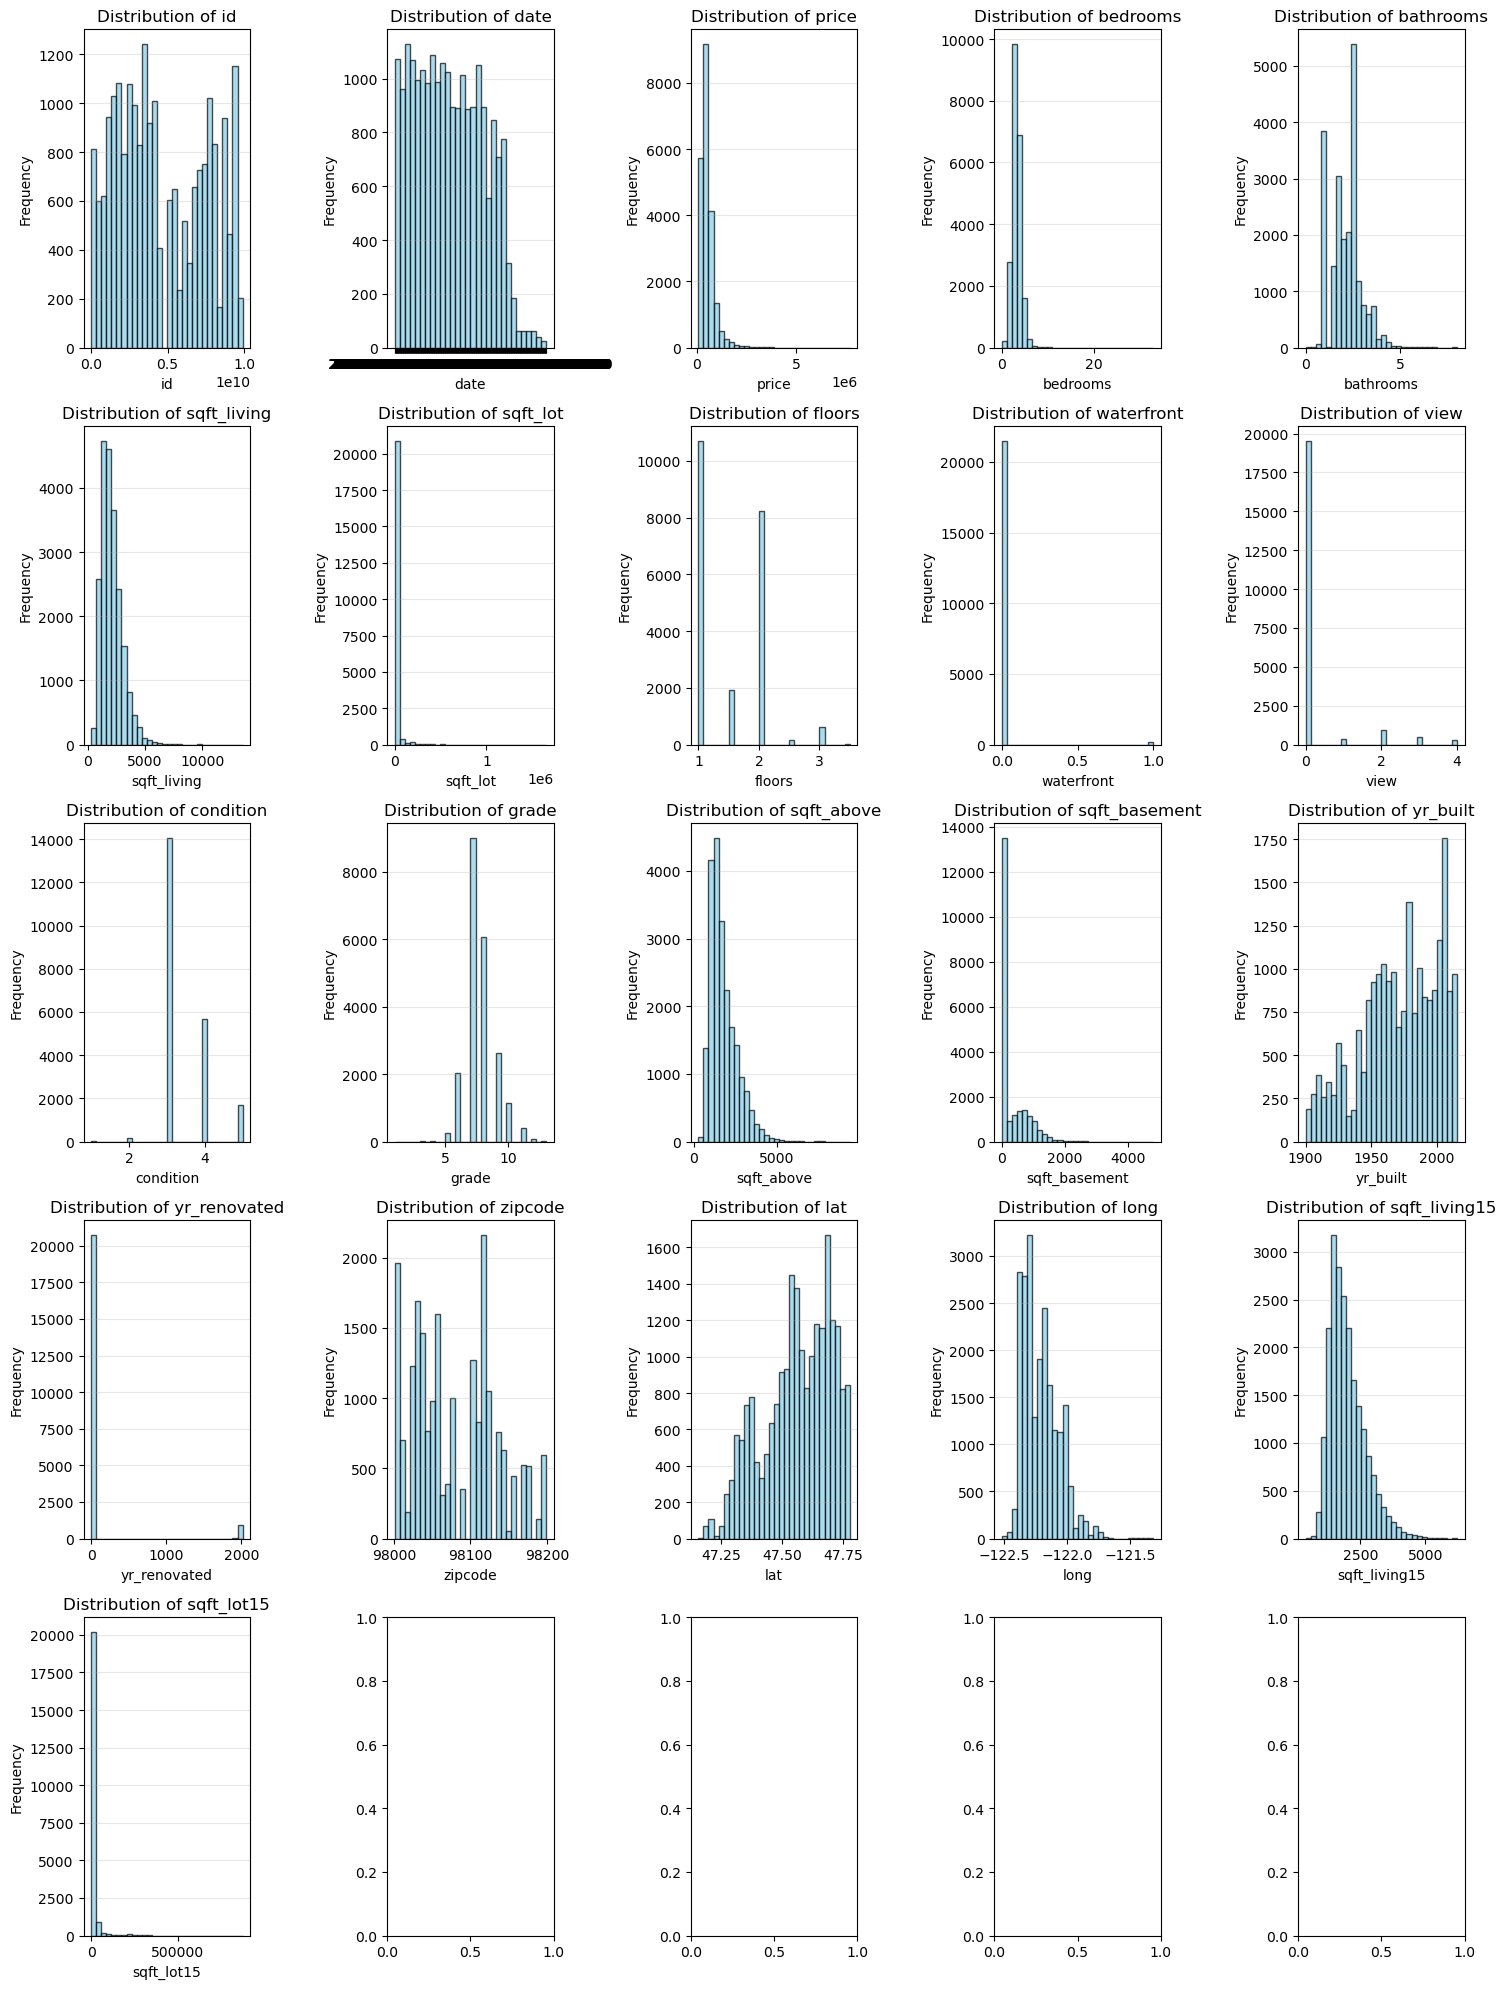

In [80]:
# Visualizing and examining the data
fig, axes = plt.subplots(5, 5, figsize=(15, 20))
axes = axes.ravel()

for idx, col in enumerate(houses):  
    axes[idx].hist(houses[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [81]:
# Extract year and month from the sale date for modeling, then remove the original date column to simplify features.
houses['date'] = pd.to_datetime(houses['date'])
houses['year_sold'] = houses['date'].dt.year
houses['month_sold'] = houses['date'].dt.month
houses['day_of_week'] = houses['date'].dt.dayofweek  # Numeric: 0=Monday, ..., 6=Sunday
# delete
houses = houses.drop(columns=['date'])

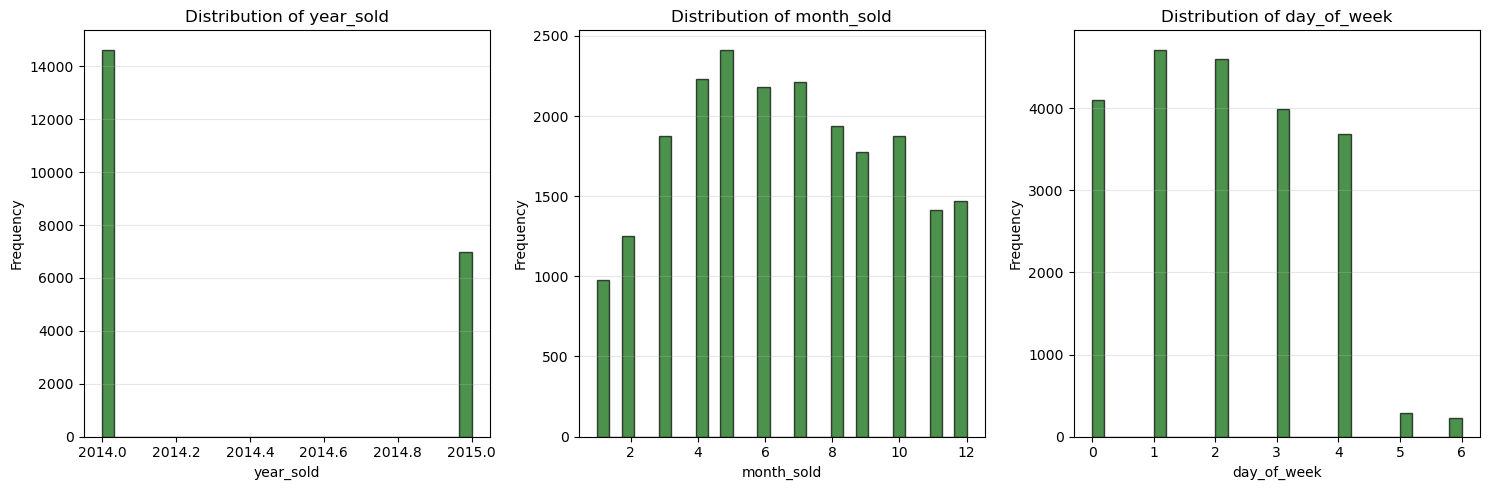

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.ravel()
date_houses=houses[['year_sold','month_sold', 'day_of_week']]

for idx, col in enumerate(date_houses):  
    axes[idx].hist(date_houses[col], bins=30, edgecolor='black', alpha=0.7, color='darkgreen')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [83]:
houses.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold', 'month_sold',
       'day_of_week'],
      dtype='object')

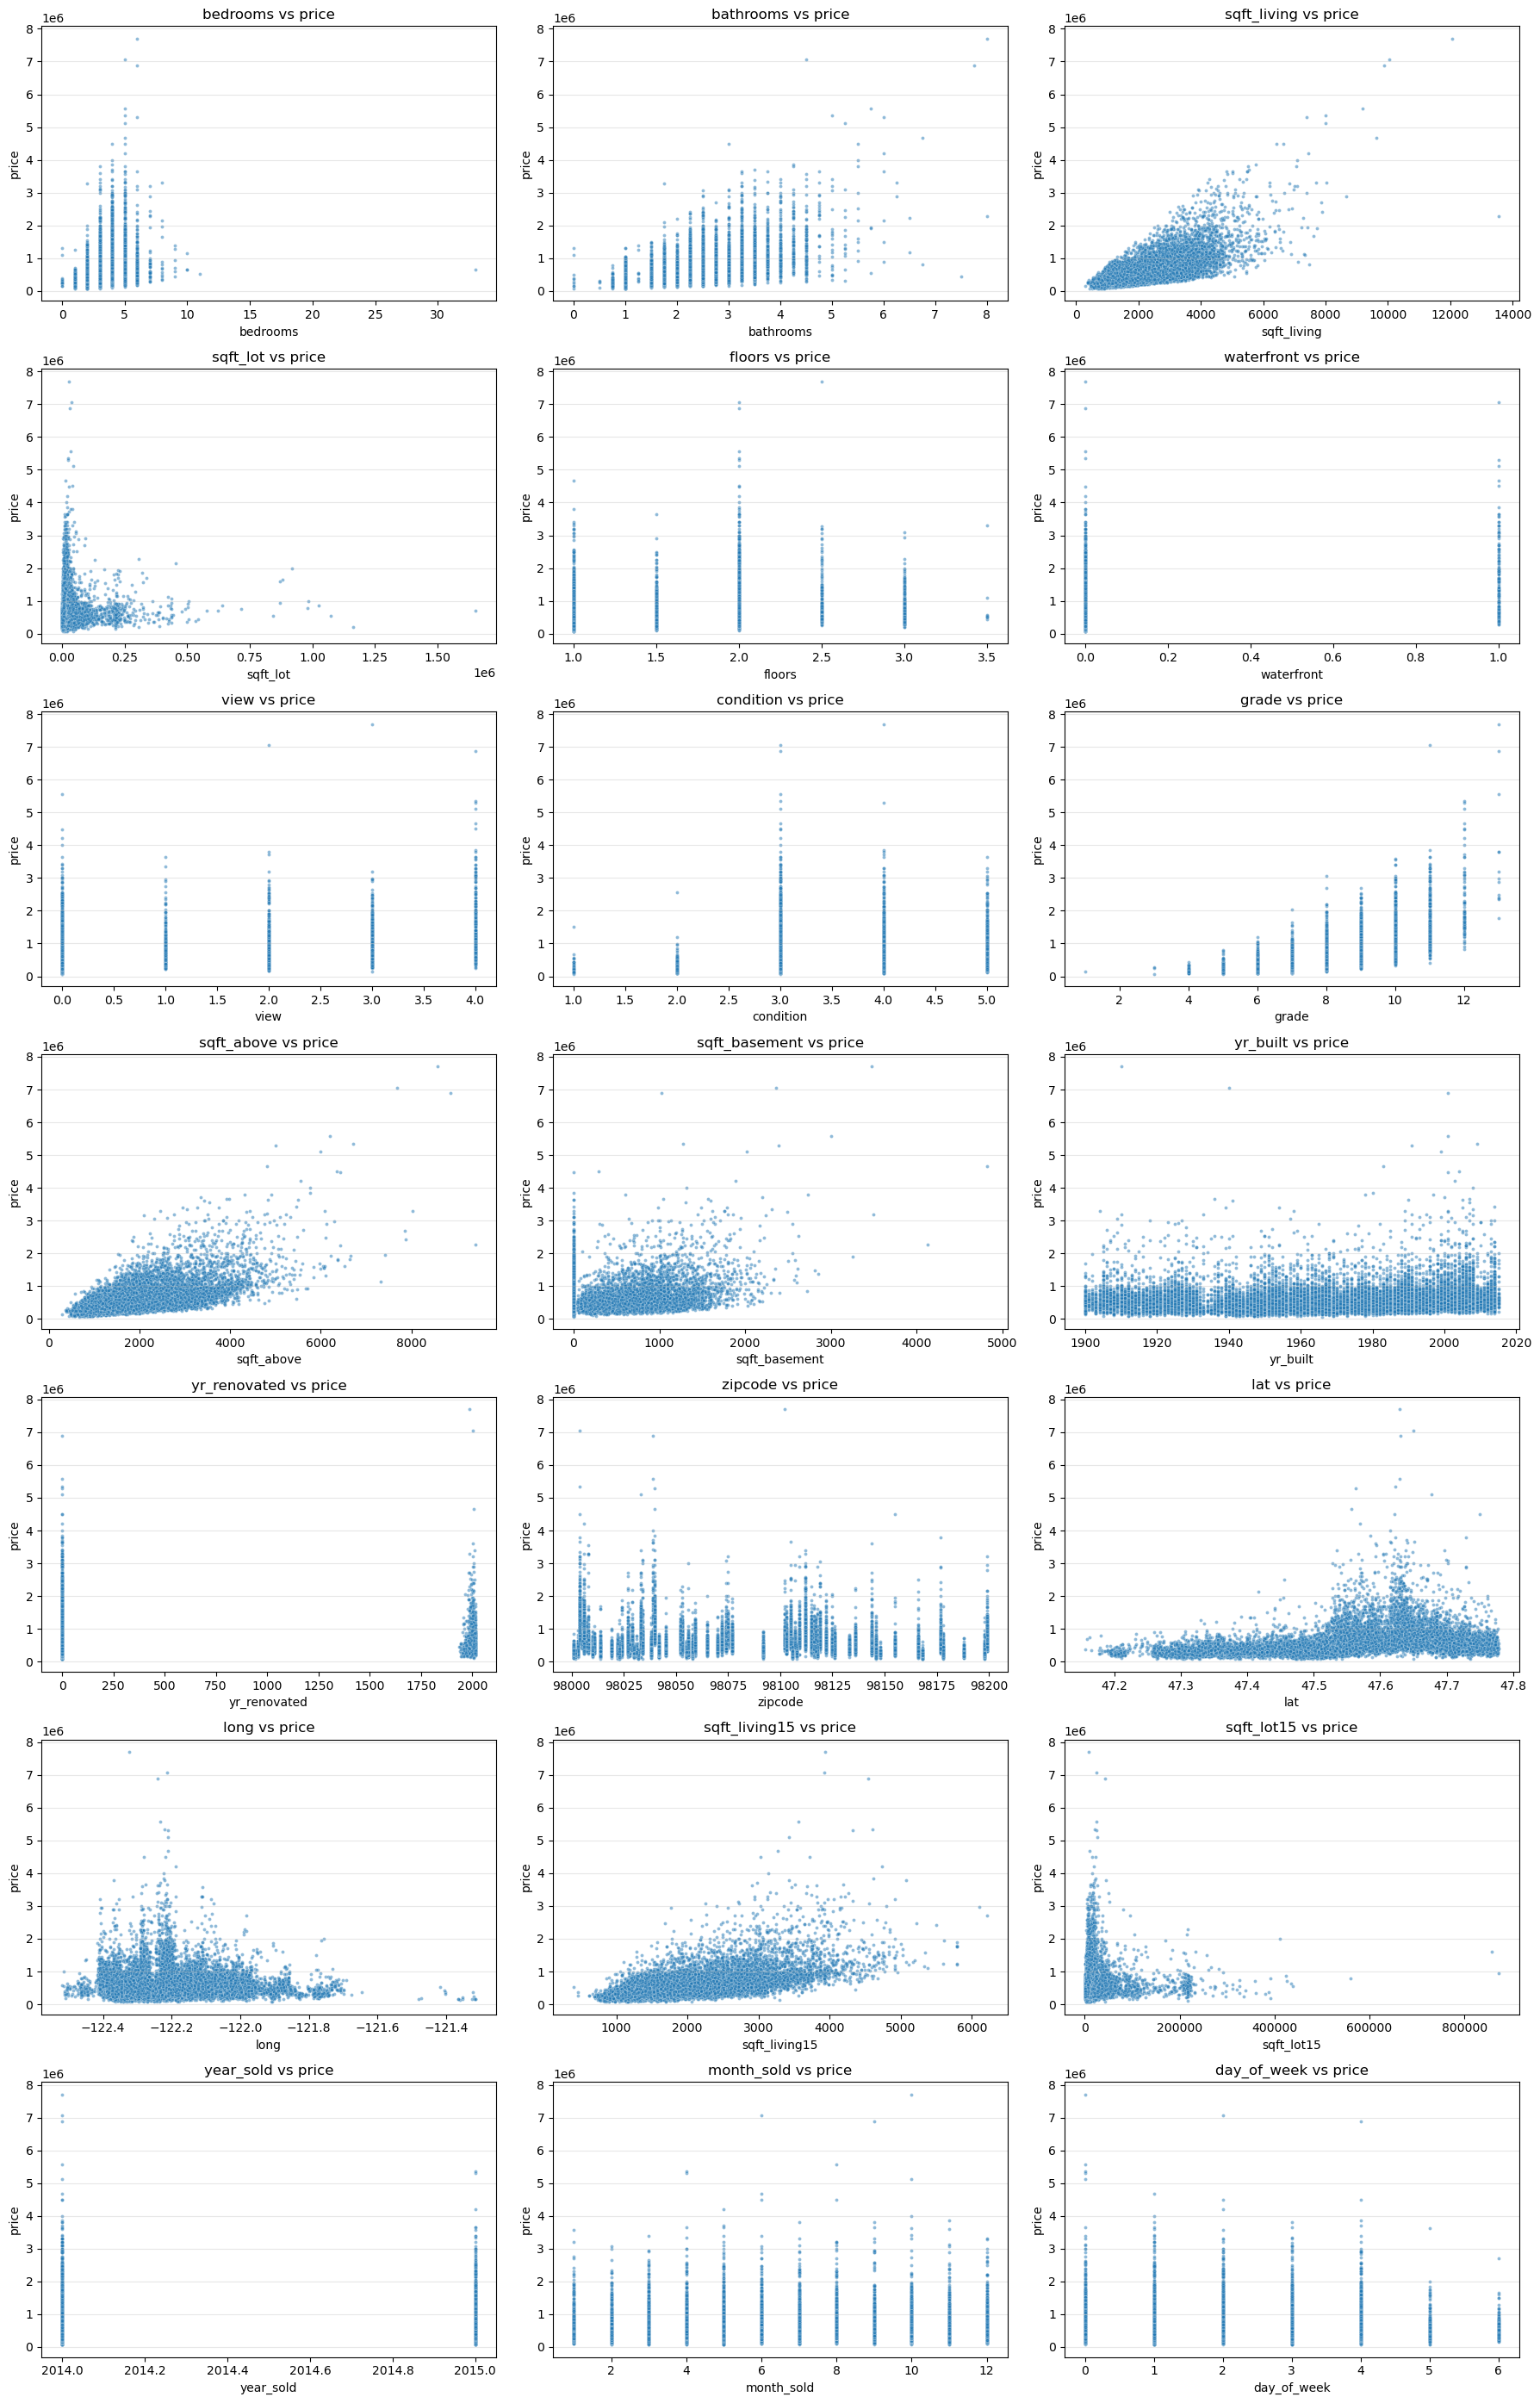

In [84]:
# Evaluation of the correlation of the target variable (price) and all the features
fig, axes = plt.subplots(7, 3, figsize=(18, 28))
axes = axes.ravel()

features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold', 'month_sold', 'day_of_week']


for idx, col in enumerate(features):
    ax = axes[idx]
    sns.scatterplot(
        data=houses,
        x=col,
        y='price',
        ax=ax,
        s=8,           # smaller points for readability
        alpha=0.5
    )
    ax.set_title(f'{col} vs price')
    ax.set_xlabel(col)
    ax.set_ylabel('price')
    axes[idx].grid(axis='y', alpha=0.3)

# Turn off any unused subplots (e.g., 24 slots, 21 features)
for j in range(len(features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [85]:
# Zooming in in a few features
for col in key_features:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=houses,
        x=col,
        y='price',
        s=15,
        alpha=0.6
    )
    plt.title(f'{col} vs price')
    plt.xlabel(col)
    plt.ylabel('price')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


NameError: name 'key_features' is not defined

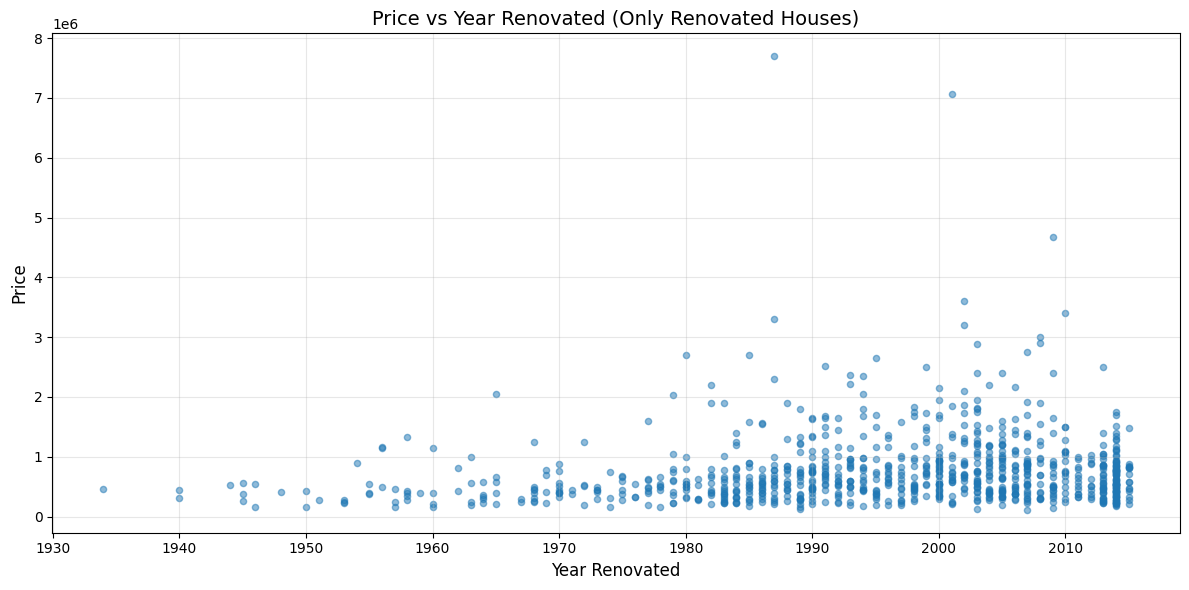

Number of renovated houses: 914
Year range: 1934 - 2015


In [ ]:
renovated_houses = houses[houses['yr_renovated'] > 0]
plt.figure(figsize=(12, 6))
plt.scatter(renovated_houses['yr_renovated'], renovated_houses['price'], alpha=0.5, s=20)
plt.xlabel('Year Renovated', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price vs Year Renovated (Only Renovated Houses)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print(f"Number of renovated houses: {len(renovated_houses)}")
print(f"Year range: {renovated_houses['yr_renovated'].min()} - {renovated_houses['yr_renovated'].max()}")

In [ ]:
def categorize_renovation_year_numeric(year):
    if year == 0:
        return 0  # Not Renovated
    elif year < 1980:
        return 1  # Before 1980
    elif year < 1990:
        return 2  # 1980-1989
    elif year < 2000:
        return 3  # 1990-1999
    elif year < 2010:
        return 4  # 2000-2009
    else:
        return 5  # 2010+


houses['was_renovated'] = (houses['yr_renovated'] > 0).astype(int)

In [ ]:
houses['was_renovated'].nunique()
houses['was_renovated'].value_counts()

was_renovated
0    20699
1      914
Name: count, dtype: int64

In [ ]:
houses['renovation_period'] = houses['yr_renovated'].apply(categorize_renovation_year_numeric)

In [ ]:
houses.sample(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_of_week,was_renovated,renovation_period
17261,5300200050,280000.0,4,2.75,2230,10160,1.0,0,0,3,...,98168,47.5123,-122.320,1740,10080,2014,7,1,0,0
11857,2558630060,425000.0,3,2.25,1820,8058,1.0,0,0,3,...,98034,47.7241,-122.168,1850,7384,2014,5,4,0,0
12048,3580900200,440000.0,4,2.00,1450,8400,1.5,0,0,4,...,98034,47.7285,-122.240,1450,7440,2014,6,1,0,0
16147,8854000010,540000.0,5,2.75,3160,10059,2.0,0,0,3,...,98011,47.7477,-122.217,3120,11557,2014,8,1,0,0
6074,3558000170,329950.0,4,2.50,1920,4600,2.0,0,0,3,...,98038,47.3795,-122.023,2200,6600,2014,7,4,0,0


In [ ]:
houses['renovation_period'].value_counts()

renovation_period
0    20699
4      272
5      186
3      182
2      152
1      122
Name: count, dtype: int64

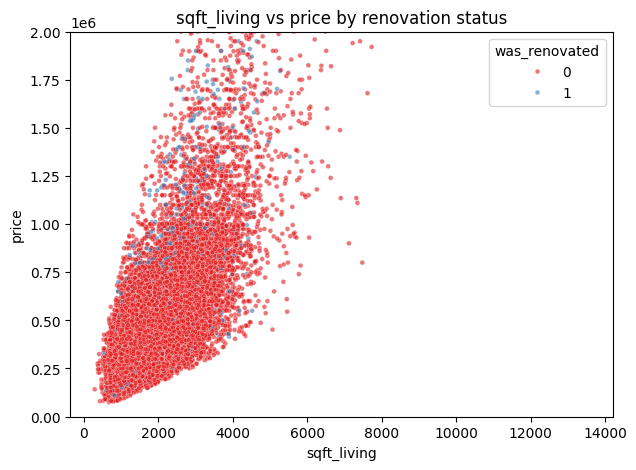

In [ ]:
# Trying to see whether the column 'was_renovated' adds to the 'sqft_living'

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=houses,
    x='sqft_living',
    y='price',
    hue='was_renovated',
    palette='Set1',
    s=12,
    alpha=0.6
)
plt.ylim(0, 2_000_000)    # zoom on typical prices
plt.title('sqft_living vs price by renovation status')
plt.show()


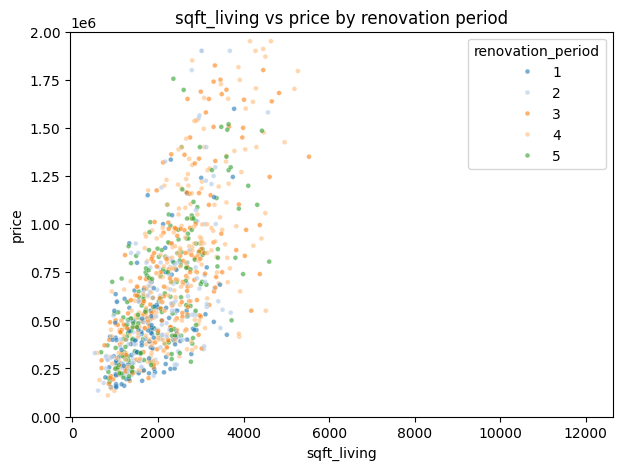

In [ ]:
# Zooming in into renovated houses
renovated_houses=houses[houses['was_renovated']==1]

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=renovated_houses,
    x='sqft_living',
    y='price',
    hue='renovation_period',
    palette='tab20',
    s=12,
    alpha=0.6
)
plt.ylim(0, 2_000_000)    # zoom on typical prices
plt.title('sqft_living vs price by renovation period')
plt.show()



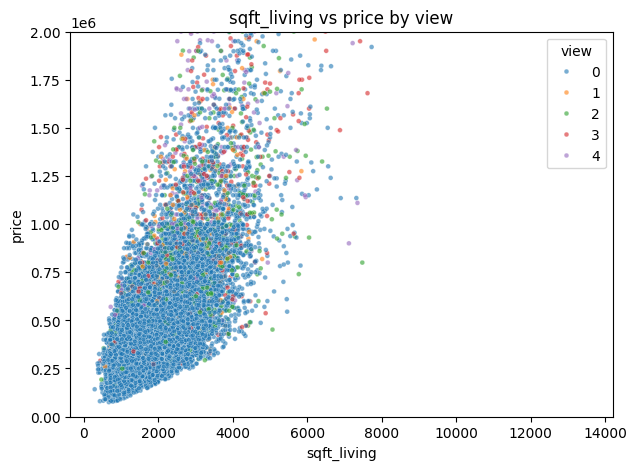

In [ ]:
# Trying to see whether the column 'waterfront' adds to the 'sqft_living'

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=houses,
    x='sqft_living',
    y='price',
    hue='view',
    palette='tab10',
    s=12,
    alpha=0.6
)
plt.ylim(0, 2_000_000)    # zoom on typical prices
plt.title('sqft_living vs price by view')
plt.show()

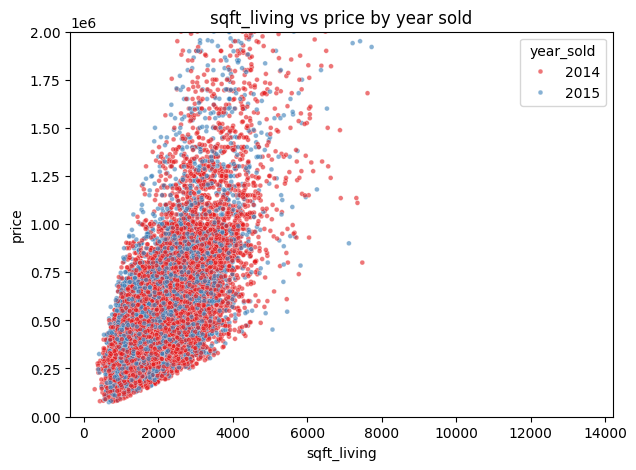

In [ ]:
# Trying to see whether the column 'was_renovated' adds to the 'sqft_living'

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=houses,
    x='sqft_living',
    y='price',
    hue='year_sold',
    palette='Set1',
    s=12,
    alpha=0.6
)
plt.ylim(0, 2_000_000)    # zoom on typical prices
plt.title('sqft_living vs price by year sold')
plt.show()

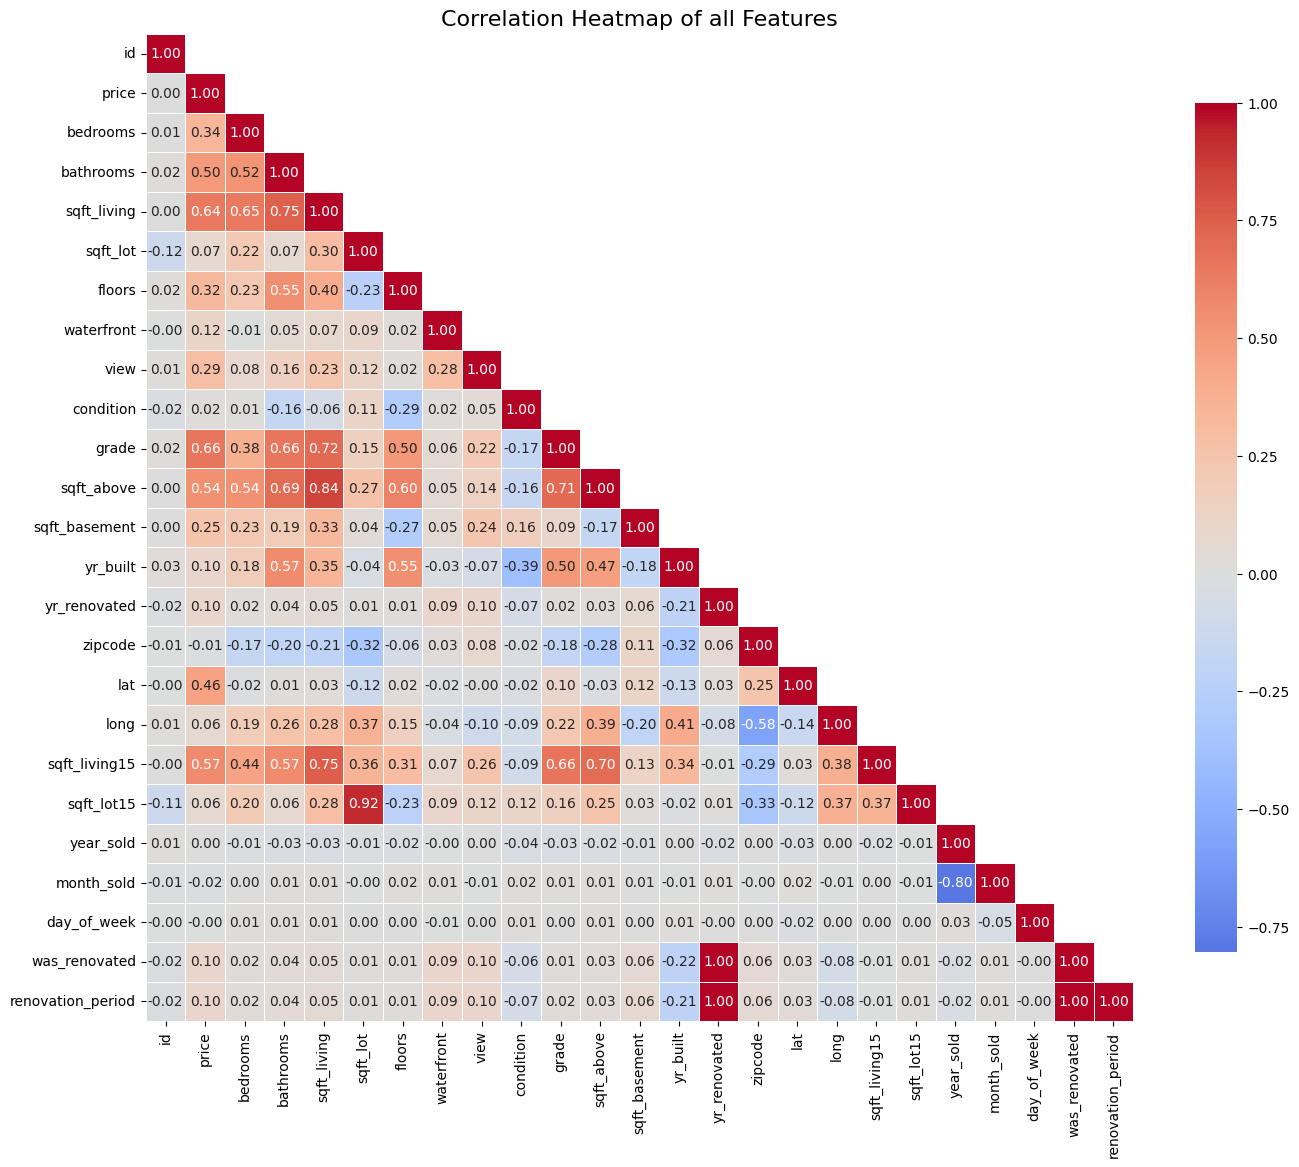

In [ ]:
# Calculate correlation matrix for all features and target variable
correlation_matrix = houses.corr(method='spearman')

# Fix 2: Mask upper triangle, keep diagonal visible
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
# k=1 means mask starts ONE diagonal above main diagonal

# Create heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of all Features', fontsize=16)
plt.tight_layout()
plt.show()

## LM training Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


**Our observations**:  



In [ ]:

X = houses.drop(columns=['price'])
y = houses['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R²:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)
print(coeff_df.head(15))
print(coeff_df.tail(15))

R²: 0.702658894695386
MSE: 44951050718.77131
RMSE: 212016.62840157445
          Feature    Coefficient
15            lat  597916.747267
6      waterfront  562552.235579
9           grade   94938.117464
7            view   53479.041789
2       bathrooms   44622.974302
19      year_sold   37127.091980
8       condition   25768.468890
5          floors    7636.185524
20     month_sold    1300.890796
21    day_of_week     253.983436
3     sqft_living     108.985989
10     sqft_above      69.846901
11  sqft_basement      39.139088
13   yr_renovated      21.411348
17  sqft_living15      21.350629
          Feature    Coefficient
5          floors    7636.185524
20     month_sold    1300.890796
21    day_of_week     253.983436
3     sqft_living     108.985989
10     sqft_above      69.846901
11  sqft_basement      39.139088
13   yr_renovated      21.411348
17  sqft_living15      21.350629
4        sqft_lot       0.077818
0              id      -0.000001
18     sqft_lot15      -0.341798
14    

C:\Users\VORPC\AppData\Local\Temp\ipykernel_23392\2249520183.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


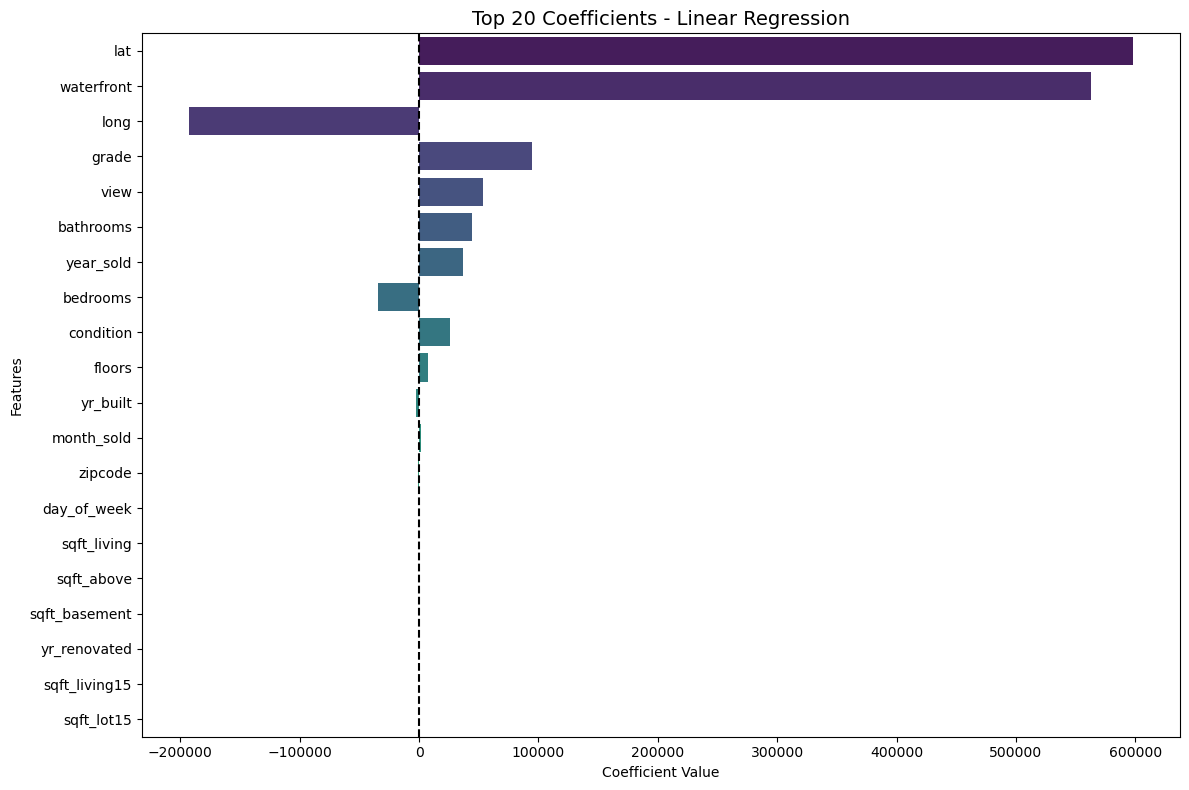

In [ ]:
coeff_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": lr.coef_
})   
coeff_df["abs_coeff"] = coeff_df["coefficient"].abs()
coeff_sorted = coeff_df.sort_values("abs_coeff", ascending=False)
top_n = 20
top_coeffs = coeff_sorted.head(top_n)
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_coeffs,
    x="coefficient",
    y="feature",
    palette="viridis"
)
plt.title(f"Top {top_n} Coefficients - Linear Regression", fontsize=14)
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.axvline(x=0, linestyle="--", color="black")
plt.tight_layout()
plt.show() 

In the coefficient plot, we observe that sqft_living, grade, and bathrooms have the highest and most positive coefficients.
 This means that larger houses, with higher construction quality and more bathrooms, tend to increase the price.
On the other hand, variables with negative coefficients, such as bedrooms or certain zipcodes, show that when these characteristics increase, the price tends to decrease, probably because they are related to other variables such as house size or location.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
print("KNN R²:", r2_knn)
print("KNN MSE:", mse_knn)
print("KNN RMSE:", rmse_knn)

KNN R²: 0.7564230421788498
KNN MSE: 36823163664.928505
KNN RMSE: 191893.6259101081


The KNN regression model shows stronger performance compared to the linear regression. With an R² of 0.756, it explains about 75.6% of the variation in house prices, which is an improvement over the linear model’s 70%. The RMSE is €191,894, lower than the linear model’s €212,017, meaning predictions are closer to actual values. This suggests KNN is better at capturing complex, nonlinear patterns in the data. Further improvements may be possible by tuning the number of neighbors, scaling features, or applying weighted distances.

In [ ]:
houses["living_to_lot_ratio"] = np.where(
    houses["sqft_lot"] > 0,
    houses["sqft_living"] / houses["sqft_lot"],
    np.nan
)
houses["bath_per_bed"] = np.where(
    houses["bedrooms"] > 0,
    houses["bathrooms"] / houses["bedrooms"],
    np.nan
)
houses["living15_diff"] = houses["sqft_living"] - houses["sqft_living15"]

We added three new features to improve the model: living_to_lot_ratio shows how much of the land is used for living space, bath_per_bed reflects the comfort level by comparing bathrooms to bedrooms, and living15_diff compares the house size to nearby homes. These features help the model understand context better and may lead to more accurate predictions.


In [ ]:
houses.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_of_week,iving_to_lot_ratio,bath_per_bed,living15_diff,living_to_lot_ratio
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,-122.257,1340,5650,2014,10,0,0.208850,0.333333,-160,0.208850
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,-122.319,1690,7639,2014,12,1,0.354874,0.750000,880,0.354874
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,-122.233,2720,8062,2015,2,2,0.077000,0.500000,-1950,0.077000
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,-122.393,1360,5000,2014,12,1,0.392000,0.750000,600,0.392000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,-122.045,1800,7503,2015,2,2,0.207921,0.666667,-120,0.207921


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Split into train/test
X = houses.drop(columns=['price'])
y = houses['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Create and train the Random Forest
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
# 3. Predict and evaluate
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"R²:  {r2:.3f}")
print(f"RMSE: {rmse:,.0f}")

R²:  0.858
RMSE: 146,737


In [ ]:
price_min = y_test.min()
price_max = y_test.max()
price_range = price_max - price_min
price_mean = y_test.mean()
rmse_range_pct = rmse / price_range * 100      # RMSE as % of range
rmse_mean_pct = rmse / price_mean * 100        # RMSE as % of mean price
print(f"RMSE: {rmse:,.0f}")
print(f"Price range: {price_min:,.0f} – {price_max:,.0f}")
print(f"RMSE as % of range: {rmse_range_pct:.2f}%")
print(f"RMSE as % of mean price: {rmse_mean_pct:.2f}%")

RMSE: 146,737
Price range: 82,500 – 5,570,000
RMSE as % of range: 2.67%
RMSE as % of mean price: 26.71%
